In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets

%matplotlib inline

In [4]:
iris = datasets.load_iris()

print('data shape is {}'.format(iris.data.shape))
print('class shape is {}'.format(iris.target.shape))

data shape is (150, 4)
class shape is (150,)


For the simplicity, we will only use the first two features (i.e., sepal length and sepal width) of the data set to classify the flowers.


In [5]:
X = iris.data[:, :2] 
y = iris.target

### 1.2. Visualizing the classes of the flowers
We create a scatter plot of the dataset below. The x and y axis represent the sepal length and sepal width of the dataset, and the color of the points represent the different classes of flowers.

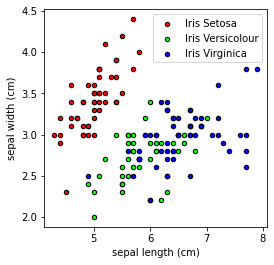

In [6]:
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

K = 3
x = X[-1]

fig, ax = plt.subplots(figsize=(4,4))
for i, iris_class in enumerate(['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,1], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
ax.legend();

The idea behind a k-nearest neighbor classifier is very simple: 

1. Given a training set $\boldsymbol X \in \mathbb{R}^{N \times D}$ and $\boldsymbol y \in \mathbb{Z}^N$; where, $N$ is the number of data points in the data set, and $D$ is the dimensionality of the data.
2. We predict the label of a novel point $\boldsymbol x \in \mathbb{R}^{D}$ __as the label of the majority of its "K-nearest neighbor"__ by using distance measure (e.g., the Euclidean distance).


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=7) # k = 7
knn.fit(X_train, y_train) 
print("Accuracy:", knn.score(X_test, y_test)) 


Accuracy: 0.8
